In [18]:
#Importing the libraries required
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#setting the Train dataset and test dataset path in the folder
train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
#Setting the image size of all the input images supported for Resnet50 model
IMAGE_SIZE = [224, 224]

In [4]:
'''Importing the resnet model We do not include the top, 
because that is what we want to train ourselves. 
We only load convolutional weights that are trained on ImageNet data. 
After loading the model the layers are set “not trainable”, thus frozen.'''
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

/home/kartikkitukale/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [5]:
resnet

In [6]:
for layer in resnet.layers:
    layer.trainable = False

In [7]:
#Getting the number of Output classes
folders = glob('Datasets/Train/*')

In [8]:
print(folders)

['Datasets/Train/Ferrari', 'Datasets/Train/Bentley', 'Datasets/Train/Mercedes', 'Datasets/Train/Lamborghini']


In [9]:
#Flattening the layers
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
#Model creation  .Taking the resnet input shape and output as required to classify into 4 classes instead of 1000.
model = Model(inputs=resnet.input, outputs=prediction)

In [12]:
#Summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
______________________________________________________________________________________________

In [13]:
#Compiling the model with cost and optimization method and metrics
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
#Using the ImageDataGenerator for data augmentation process in training images only (Not testing )
#Scaling of training and testing images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 159 images belonging to 4 classes.


In [16]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 46 images belonging to 4 classes.


In [22]:
#Fitting the model 
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
5/5 [==============================] - 17s 3s/step - loss: 11.4742 - acc: 0.3333 - val_loss: 3.4968 - val_acc: 0.3043
Epoch 2/50
5/5 [==============================] - 15s 3s/step - loss: 4.5110 - acc: 0.6918 - val_loss: 7.2032 - val_acc: 0.2391
Epoch 3/50
5/5 [==============================] - 16s 3s/step - loss: 2.3274 - acc: 0.8113 - val_loss: 7.9875 - val_acc: 0.3043
Epoch 4/50
5/5 [==============================] - 16s 3s/step - loss: 0.7224 - acc: 0.9182 - val_loss: 8.8602 - val_acc: 0.3043
Epoch 5/50
5/5 [==============================] - 16s 3s/step - loss: 0.5181 - acc: 0.9245 - val_loss: 9.1800 - val_acc: 0.3043
Epoch 6/50
5/5 [==============================] - 16s 3s/step - loss: 0.3486 - acc: 0.9623 - val_loss: 9.7841 - val_acc: 0.3043
Epoch 7/50
5/5 [==============================] - 17s 3s/step - loss: 0.1188 - acc: 0.9686 - val_loss: 9.5017 - val_acc: 0.3043
Epoch 8/50
5/5 [==============================] - 16s 3s/step - loss: 0.0885 - acc: 0.9874 - val_loss: 

In [20]:
tf.test.is_built_with_cuda()

False

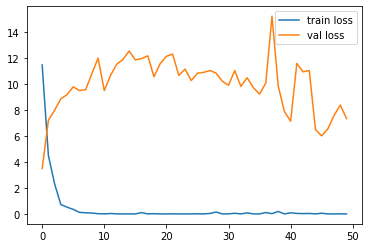

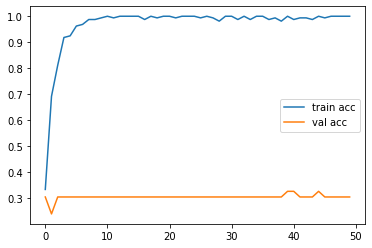

<Figure size 432x288 with 0 Axes>

In [24]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')